# Pandas Tutorial P12

https://pythonprogramming.net/comparison-operators-data-analysis-python-pandas-tutorial/?completed=/rolling-statistics-data-analysis-python-pandas-tutorial/

<module 'matplotlib.pyplot' from 'C:\\Users\\jguo\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

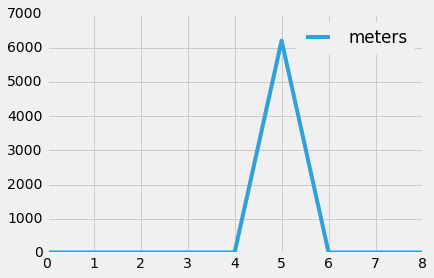

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

# Demonstrate outlier
bridge_height = {'meters':[10.26, 10.31, 10.27, 10.22, 10.23, 6212.42, 10.28, 10.25, 10.31]}
df = pd.DataFrame(bridge_height)

df.plot()
plt

In [2]:
# How to detect outliers? Use rolling std
df['STD'] = df['meters'].rolling(window=2).std()
print(df.describe())

            meters          STD
count     9.000000     8.000000
mean    699.394444  1096.419446
std    2067.384584  2030.121949
min      10.220000     0.007071
25%      10.250000          NaN
50%      10.270000          NaN
75%      10.310000          NaN
max    6212.420000  4385.610607


C:\Users\jguo\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


C:\Users\jguo\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


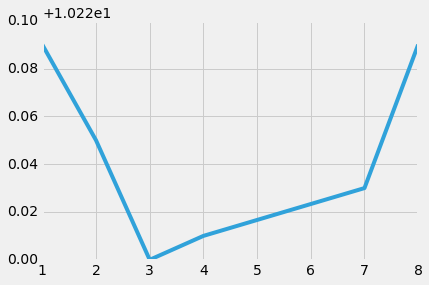

In [3]:
# Save the statistic (std of meters) and only keep obs where the rolling STD is lower than this value

df_std = df.describe().meters['std']
df = df[ df['STD']<df_std ]
df.meters.plot()

# Pandas Tutorial P13

In [4]:
import quandl

# First load the US 30-yr conventional mortgage rate
def mortgage_30y():
    df = quandl.get("FMAC/MORTG", trim_start="1975-01-01") #trim_start to set the starting point
    df["Value"] = (df["Value"]-df["Value"][0]) / df["Value"][0] * 100.0
    return df

mortgage_30y()

,Value
Date,
1975-01-01,0.000000
1975-02-01,-3.393425
1975-03-01,-5.620361
1975-04-01,-6.468717
1975-05-01,-5.514316
1975-06-01,-5.726405
1975-07-01,-5.726405
1975-08-01,-5.196182
1975-09-01,-3.181336


In [5]:
# The data above uses the first day of each month, but the state HPI data uses the last day of the month
# Need to resample the mortgage data to daily first, then to monthly (directly use 'M' does not work)
test = mortgage_30y().resample('1D').mean()
test = test.resample('M').mean()
test.head(10)

,Value
Date,
1975-01-31,0.000000
1975-02-28,-3.393425
1975-03-31,-5.620361
1975-04-30,-6.468717
1975-05-31,-5.514316
1975-06-30,-5.726405
1975-07-31,-5.726405
1975-08-31,-5.196182
1975-09-30,-3.181336


In [6]:
# Now we can join the data from previous sessions (p7-11)
HPI_data = pd.read_pickle('fiddy_states3.pickle')
m30 = test
m30.columns=['M30']

#Benchmark
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA")
    df.columns = ["United States"]
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df

# First join national benchmark with M30
HPI_Bench = HPI_Benchmark()
HPI = HPI_Bench.join(m30)
HPI.head()

,United States,M30
Date,,
1975-01-31,0.000000,0.000000
1975-02-28,0.639523,-3.393425
1975-03-31,1.681678,-5.620361
1975-04-30,3.047044,-6.468717
1975-05-31,3.922540,-5.514316


In [7]:
# Check the correlation
HPI.corr()

,United States,M30
United States,1.000000,-0.778853
M30,-0.778853,1.000000


In [8]:
# Join states data with M30
state_HPI_M30 = HPI_data.join(m30)
state_HPI_M30.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,M30
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1975-02-28,0.626500,1.485775,1.688504,0.846192,0.356177,1.159639,2.123926,0.142451,3.938796,-0.902841,...,0.112132,0.951488,1.398290,0.945247,0.987288,0.397561,2.495069,1.404920,1.438502,-3.393425
1975-03-31,1.358575,3.006473,3.261346,1.581956,1.575690,2.299449,3.719898,0.387918,9.798243,-1.282758,...,0.369186,2.701039,2.659262,1.857227,1.707474,1.015723,5.093474,2.791371,2.962512,-5.620361
1975-04-30,2.254726,4.593530,4.475810,2.183669,3.573196,3.359028,4.616778,0.891619,16.974819,-1.068371,...,0.765570,5.276570,3.662119,2.685578,2.238392,1.757887,7.772685,4.034165,4.545011,-6.468717
1975-05-31,3.107829,6.327600,5.139617,2.786248,5.241395,4.226895,4.901787,1.752086,17.891884,-0.676830,...,1.228808,6.099286,4.326186,3.413295,2.684036,2.426439,10.469784,5.047628,6.080901,-5.514316


In [9]:
# Correlation of M30 with every state
state_HPI_M30.corr()['M30']

AL    -0.796453
AK    -0.734748
AZ    -0.673961
AR    -0.788178
CA    -0.733805
CO    -0.787303
CT    -0.750397
DE    -0.790202
FL    -0.682449
GA    -0.752580
HI    -0.795357
ID    -0.767660
IL    -0.779350
IN    -0.806090
IA    -0.820293
KS    -0.789270
KY    -0.818853
LA    -0.737043
ME    -0.802695
MD    -0.768376
MA    -0.795487
MI    -0.722214
MN    -0.765481
MS    -0.790514
MO    -0.784704
MT    -0.798324
NE    -0.800434
NV    -0.596116
NH    -0.760839
NJ    -0.774544
NM    -0.766544
NY    -0.804832
NC    -0.805513
ND    -0.787380
OH    -0.781626
OK    -0.689749
OR    -0.791154
PA    -0.812888
RI    -0.763330
SC    -0.791708
SD    -0.827213
TN    -0.808287
TX    -0.726491
UT    -0.782244
VT    -0.812577
VA    -0.786206
WA    -0.791745
WV    -0.810091
WI    -0.806441
WY    -0.753197
M30    1.000000
Name: M30, dtype: float64

# P14 Incorporate mode macro indicators

In [10]:
def mortgage_30y():
    df = quandl.get("FMAC/MORTG", trim_start="1975-01-01") #trim_start to set the starting point
    df["Value"] = (df["Value"]-df["Value"][0]) / df["Value"][0] * 100.0
    df=df.resample('1D').mean()
    df=df.resample('M').mean()
    return df

def sp500_data():
    df = quandl.get("YAHOO/INDEX_GSPC", trim_start="1975-01-01")
    df["Adjusted Close"] = (df["Adjusted Close"]-df["Adjusted Close"][0]) / df["Adjusted Close"][0] * 100.0
    df=df.resample('M').mean()
    df.rename(columns={'Adjusted Close':'sp500'}, inplace=True)
    df = df['sp500']
    return df

def gdp_data():
    df = quandl.get("BCB/4385", trim_start="1975-01-01")
    df["Value"] = (df["Value"]-df["Value"][0]) / df["Value"][0] * 100.0
    df=df.resample('M').mean()
    df.rename(columns={'Value':'GDP'}, inplace=True)
    df = df['GDP']
    return df

def us_unemployment():
    df = quandl.get("ECPI/JOB_G", trim_start="1975-01-01")
    df["Unemployment Rate"] = (df["Unemployment Rate"]-df["Unemployment Rate"][0]) / df["Unemployment Rate"][0] * 100.0
    df=df.resample('1D').mean()
    df=df.resample('M').mean()
    return df

In [11]:
# Load all data
HPI_data = pd.read_pickle('fiddy_states3.pickle')

m30 = mortgage_30y()
sp500 = sp500_data()
gdp = gdp_data()
HPI_Bench = HPI_Benchmark()
unemployment = us_unemployment()

m30.columns=['M30']
HPI = HPI_Bench.join([m30,sp500,gdp,unemployment])
HPI.dropna(inplace=True)
HPI.corr()

,United States,M30,sp500,GDP,Unemployment Rate
United States,1.000000,-0.731680,0.734359,0.536095,0.028694
M30,-0.731680,1.000000,-0.625544,-0.715008,-0.395650
sp500,0.734359,-0.625544,1.000000,0.469975,-0.262561
GDP,0.536095,-0.715008,0.469975,1.000000,0.551841
Unemployment Rate,0.028694,-0.395650,-0.262561,0.551841,1.000000


In [12]:
import pickle
HPI = HPI_Bench.join([HPI_data, m30,sp500,gdp,unemployment])
pickle_out = open('HPI.pickle','wb')
pickle.dump(HPI, pickle_out)
pickle_out.close()

# P15

In [13]:
# Load the HPI dataset and convert all columns to percentage change
import pandas as pd
import numpy as np

housing_data = pd.read_pickle('HPI.pickle')
housing_data = housing_data.pct_change()

In [14]:
# Replace infinite numbers with NaN, and create a lead HPI (use .shift(-1))
housing_data.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_data['US_HPI_future'] = housing_data['United States'].shift(-1)
housing_data.head()

,United States,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,VA,WA,WV,WI,WY,M30,sp500,GDP,Unemployment Rate,US_HPI_future
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.227278,NaN,NaN,1.629583
1975-03-31,1.629583,1.168515,1.023505,0.931500,0.869499,3.423900,0.982901,0.751426,1.723162,1.487624,...,0.729460,1.554885,1.041416,0.986854,1.059442,0.656250,0.378557,NaN,NaN,0.811907
1975-04-30,0.811907,0.659626,0.527880,0.372381,0.380360,1.267703,0.460797,0.241103,1.298474,0.732435,...,0.310937,0.730676,0.526009,0.445227,0.534175,0.150943,0.065519,NaN,0.400000,0.287326
1975-05-31,0.287326,0.378362,0.377503,0.148310,0.275948,0.466865,0.258368,0.061733,0.965062,0.054025,...,0.199091,0.380316,0.346997,0.251220,0.337929,-0.147541,0.370727,NaN,0.285714,0.058848


In [15]:
# Remove NA
housing_data.dropna(inplace=True)
housing_data.head()

,United States,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,VA,WA,WV,WI,WY,M30,sp500,GDP,Unemployment Rate,US_HPI_future
Date,,,,,,,,,,,,,,,,,,,,,
1990-03-31,0.004323,0.003433,0.063291,-0.002202,0.005052,0.007243,0.001544,-0.009803,0.001564,-0.000640,...,0.001023,0.036409,0.008585,0.015752,0.012383,0.090909,0.030790,-0.234375,0.035714,0.005182
1990-04-30,0.005182,0.007235,0.097343,-0.001114,0.004866,0.005745,0.000830,-0.011515,-0.000451,0.002636,...,0.005560,0.034205,0.012494,0.015573,0.018989,0.119048,-0.001070,4.265306,-0.068966,0.005244
1990-05-31,0.005244,0.008016,0.115483,0.002258,0.005517,0.002550,0.005127,-0.011205,0.000009,0.003710,...,0.005750,0.029515,0.016855,0.011389,0.026099,0.117021,0.045054,-1.092539,0.000000,0.005103
1990-06-30,0.005103,0.004616,0.103961,0.003969,0.006417,0.003595,0.007326,-0.007019,-0.000411,0.003081,...,0.003002,0.018036,0.017798,0.009686,0.027659,-0.304762,0.036200,3.115183,0.074074,0.003712
1990-07-31,0.003712,0.000083,0.069205,0.001866,0.006427,0.004748,0.003203,-0.003224,-0.003613,0.002929,...,0.002215,0.008122,0.012048,0.009039,0.021413,-0.164384,-0.001226,0.441476,-0.103448,0.000489


In [16]:
# Use mapping to create 0/1 label to indicate whether the next HPI > current HPI
def create_labels(cur_hpi, fut_hpi):
    if cur_hpi < fut_hpi:
        return 1
    else:
        return 0
    
housing_data['label'] = list(map(create_labels, housing_data["United States"], housing_data["US_HPI_future"]))

In [17]:
# Use rolling_apply for rolling average
def moving_average(values):
    ma = np.mean(values)
    return ma

housing_data['ma_apply_example'] = housing_data['M30'].rolling(window=10).apply(func = moving_average)
housing_data.tail()

,United States,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,WV,WI,WY,M30,sp500,GDP,Unemployment Rate,US_HPI_future,label,ma_apply_example
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-31,-0.005368,-0.007822,-0.005493,0.004427,-0.000785,-0.007039,0.001194,-0.010599,-0.005274,-0.000274,...,0.001583,-0.007000,-0.001953,0.057377,-0.111461,0.023122,0.000000,-0.007191,0,-0.000015
2011-09-30,-0.007191,-0.013060,-0.006466,0.002040,-0.000425,-0.006232,-0.004441,-0.012485,-0.007305,0.000501,...,0.001093,-0.011759,-0.006551,0.031008,-0.010247,-0.039889,-0.100000,-0.008083,0,0.004432
2011-10-31,-0.008083,-0.013840,-0.007530,0.000691,0.000155,-0.006206,-0.008262,-0.013382,-0.007726,-0.002511,...,0.000151,-0.014581,-0.007730,0.007519,0.030206,0.019983,-0.111111,-0.007911,1,0.013176
2011-11-30,-0.007911,-0.006516,-0.007085,0.006674,-0.002958,-0.004146,-0.009753,-0.012650,-0.007655,-0.005350,...,-0.001287,-0.012807,-0.005047,0.014925,0.016886,0.000955,-0.250000,-0.008820,0,0.015728
2011-12-31,-0.008820,0.000361,-0.005305,0.007655,-0.006209,-0.006355,-0.007674,-0.010455,-0.007249,-0.005395,...,-0.001975,-0.011333,-0.001820,0.005515,0.014624,-0.022139,-0.333333,-0.007335,1,0.020348


## P16 

Build a SVM classifier to predict label

In [18]:
from sklearn import svm, preprocessing, cross_validation

In [19]:
# Create feature space and response. Note we need to prepare the data in arrays
housing_data.dropna(inplace=True)

X = np.array(housing_data.drop(['label', 'US_HPI_future'], 1))
X = preprocessing.scale(X)

y = np.array(housing_data['label'])

In [20]:
#  Create training and testing sets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [21]:
# Create SVM classifier
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.70588235294117652